## Importing the relevant libraries

In [124]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Load the raw data

In [125]:
raw_data = pd.read_csv("D:/Downloads/1.04.+Real-life+example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


This is a list of second-hand cars with the respective price, type of body, mileage, engine volume, engine type, year of production, model, and information about the time when they were registered

## Preprocessing

### Exploring the descriptive statistics of the variables

In [126]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


There are 312 unique models. That's something really hard to implement at a regression. That would mean more than 300 dummies. A lot of the information from model could be engineered from brand, year, and engine volume, so we won't be losing too much variability. Reliably implementing model into a regression would be a very hard task, so we'll drop the variable

In [127]:
data = raw_data.drop(['Model'],axis=1) #axis = 0 means rows, axis = 1 means columns
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Let’s check for the missing-values

Brand, body, mileage, registration, and year seem to have no missing values, given that the total number of observations is 4,345. But price and engine are not.

In [128]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Price and engine volume are the only features with missing values, but only several of them. Therefore, I'll simply delete those observations. 

In [129]:
data_no_mv = data.dropna(axis = 0)

In [130]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs (Probability Density Function)

Notice the minimum and maximum values with respect to the mean and the quartiles for each variable. Moreover, I'll print the probability-distribution functions for each feature as we discuss them.

<Axes: xlabel='Price', ylabel='Density'>

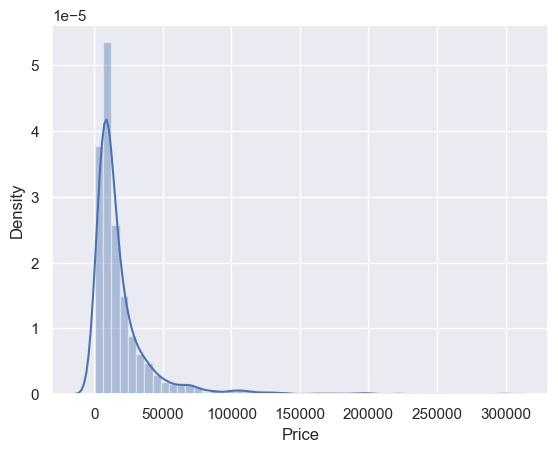

In [131]:
sns.distplot(data_no_mv['Price'])

Price has a mean around 19,000. The minimum price is 600. 25% of prices are under 7,000, 50% below 11,500, and 75% are lower than 21,900. Yet the maximum price is 300,000. Obviouly, we have a few outliers in the price variable \
One way to deal with that seamlessly is to remove the top 1% of observations \
DataFrame.quantile(the quantile): returns the value at the given quantile (= np.percentile) 

### Dealing with outliers

In [132]:
#return value of Price where 99% of the values ​​in the Price column are below this value
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


The maximum value is around $130,000, or the 99th percentil While still far away form the mean, it is acceptably closer \
The data is still distributed in the same way but with less outliers

<Axes: xlabel='Price', ylabel='Density'>

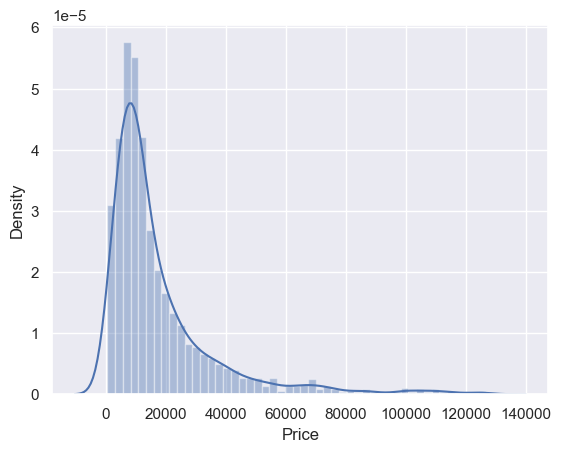

In [133]:
sns.distplot(data_1['Price'])

<Axes: xlabel='Mileage', ylabel='Density'>

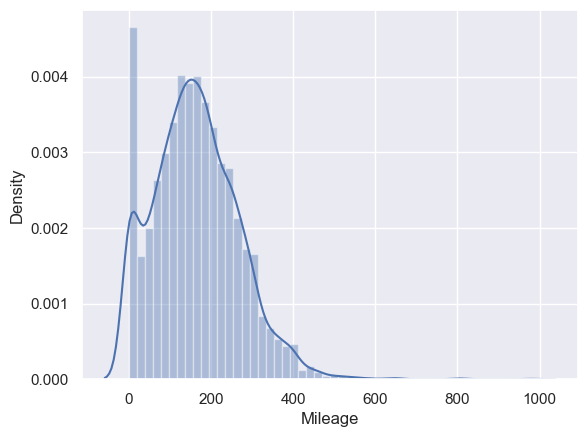

In [134]:
sns.distplot(data_no_mv['Mileage'])

However, we have a similar issue with mileage, engine volume, and year. We can see that the situation with mileage is almost identical from its PDF \
Therefore, we can deal with it in the same way, by keeping only the data lower than the 99th percentile.

In [135]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<Axes: xlabel='Mileage', ylabel='Density'>

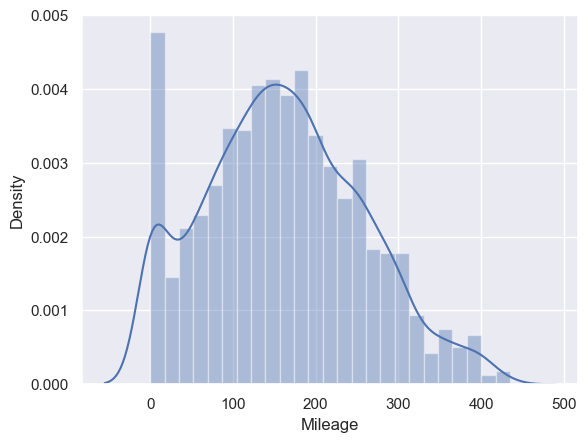

In [136]:
sns.distplot(data_2['Mileage'])

<Axes: xlabel='EngineV', ylabel='Density'>

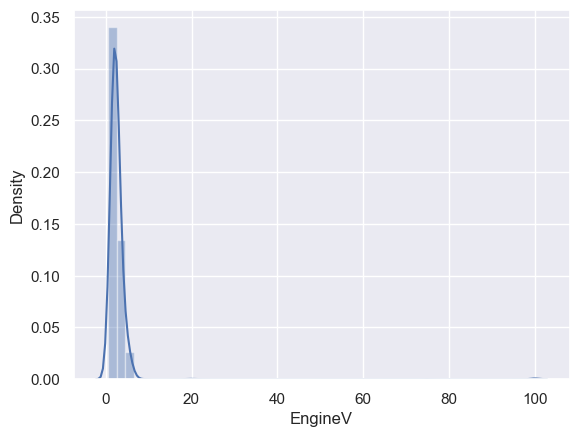

In [137]:
sns.distplot(data_no_mv['EngineV'])

*Here is engine volumn's PDF* \
It is rather strange. If we were to examine engine volume manually, we will notice that there are also the engine volume values of 99.99, 90, 75, etc.
Moreover, looking at the descriptives, it seems that most values are really low. A quick search on Google would confirm that the interval where engine volume should fall is between 0.6 and 6.5. Therefore, those 99.99s, 90s, and so on are incorrect entries. \
Actually, a common way to label missing values is by assigning 99.99. That's something that's stuck from the early ages of computers. It is a bad idea to label values in such ways, as it is very hard for other users of the data to distinguish them from the true values. \
Here, we have a benchmark, 6.5. This time, I'll remove all values that are lower than 6.5, as I know the natural domain of the engine volume values.

In [138]:
data_3 = data_2[data_2['EngineV']<6.5]

<Axes: xlabel='EngineV', ylabel='Density'>

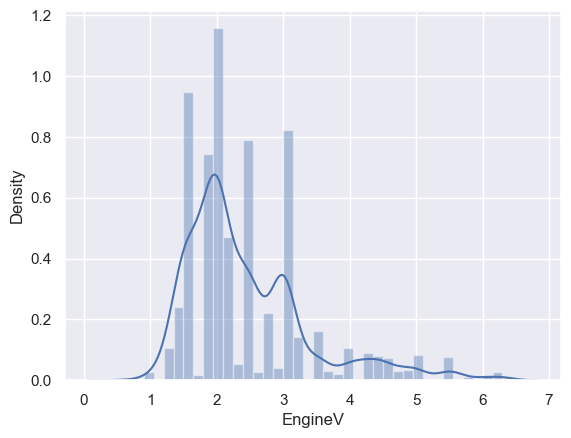

In [139]:
sns.distplot(data_3['EngineV'])

<Axes: xlabel='Year', ylabel='Density'>

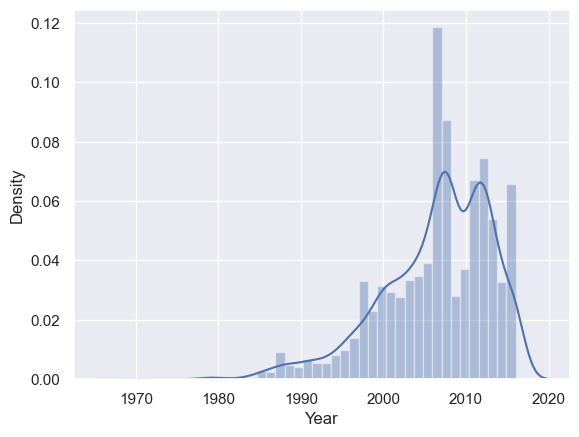

In [140]:
sns.distplot(data_no_mv['Year'])

Most cars are newer but there seem to be a few vintage cars. This time, I'll take the first percentile, and then we'll keep all observations that are higher.

In [141]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<Axes: xlabel='Year', ylabel='Density'>

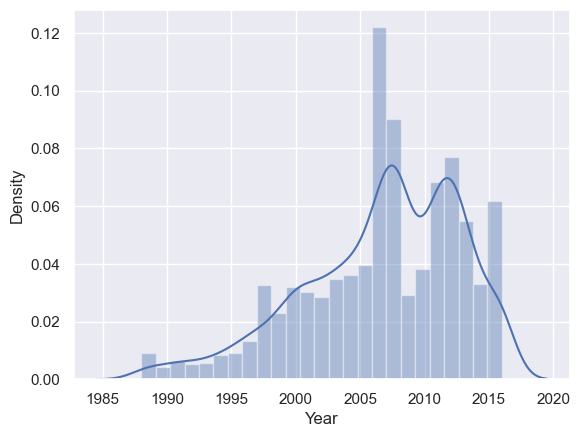

In [142]:
sns.distplot(data_4['Year'])

In [143]:
data_cleaned = data_4.reset_index(drop=True)

In [144]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Overall, we've deleted around 250 observations which are the problematic ones.

## Checking the OLS assumptions 

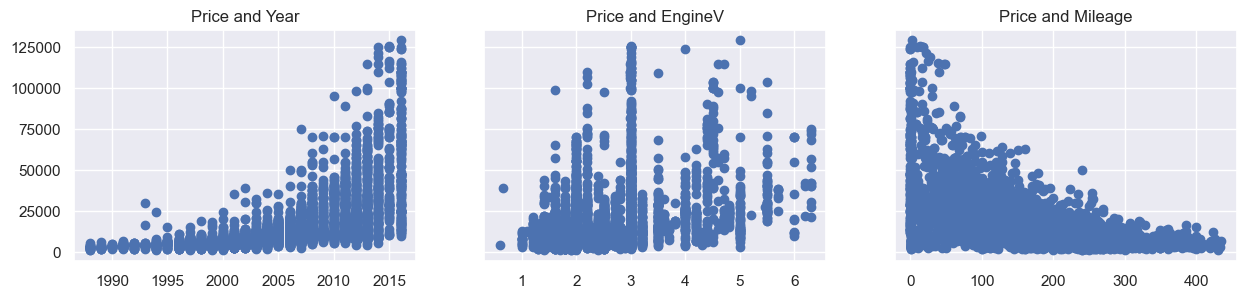

In [145]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

We can spot patterns, but definitely not linear ones. 
We know we should not run a linear regression in this cas We should first transform one or more variables.e.

<Axes: xlabel='Price', ylabel='Density'>

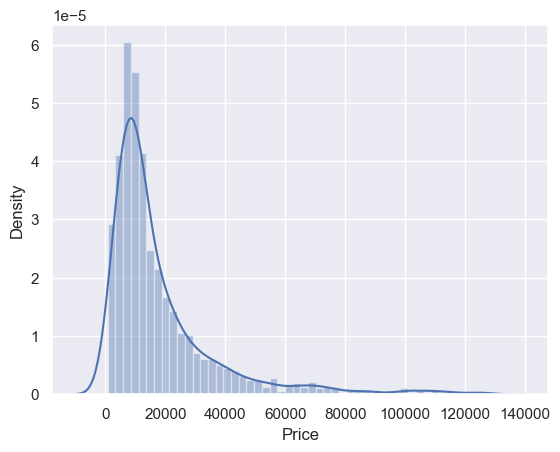

In [146]:
sns.distplot(data_cleaned['Price'])

All these plots are pointing us towards the idea that price is not normally distributed, and from there its relationships with the other rather normally distributed features is not linear.

log transformations are especially useful when facing exponential relationships \
np.log(x): returns the natural logarithm of a number or array of numbers

### Relaxing the assumptions

In [147]:
log_price = np.log(data_cleaned['Price'])

In [148]:
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


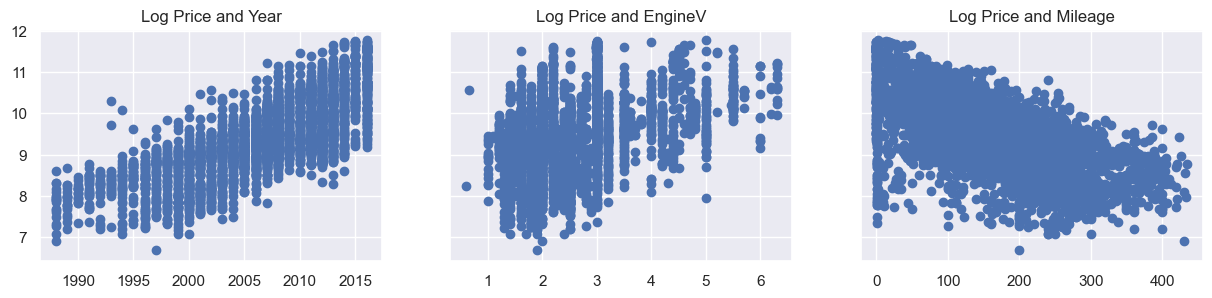

In [149]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

We can see a linear pattern in all plots now. The lines fit the data so much better

In [150]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1)

### Multicollinearity

In [151]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

It is logical that year and mileage are going to be correlated. The newer the car, the lower its mileage. Therefore, we have grounds to expect some degree of multicollinearity in the data \
One of the best ways to check for multicollinearity is through VIF, or variance inflation factor

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [153]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


VIF = 1: no multicollinearity (also the minimum value of the measure) \
1 < VIF < 5: perfectly okay \
10 < VIF: unaccaptable

=> Year is definitely too correlated with the other variables -> remove year

In [154]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis = 1)

## Create dummy variables

pd.get_dummies(df [, drop_first]): spots all categorical variables and creates dummies automatically. \
If we have N categories for a feature, we have to create N-1 dummies

In [155]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [156]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [157]:
#fix the value
columns_to_convert = data_with_dummies.columns.difference(['log_price', 'Mileage', 'EngineV'])

data_with_dummies[columns_to_convert] = data_with_dummies[columns_to_convert].astype(int)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange

In [158]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [159]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [160]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

### Declare the inputs and the targets

In [161]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

### Scale the data

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [163]:
inputs_scaled = scaler.transform(inputs)

Scaling has no effect on the predictive power of dummies, one scale, though, they lose all their dummy meaning

### Trai Test Split

In [164]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [165]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [166]:
y_hat = reg.predict(x_train)

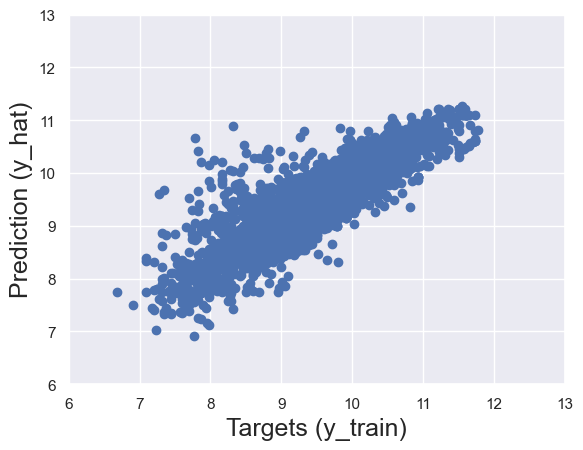

In [167]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Prediction (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In the best case scenario, if a target is seven, we want the prediction to be seven. If a target is 10, we want the prediction to be also 10. Ultimately, we can draw a 45 degree line, which shows the best possible match, between targets and predictions. The closer our scatter plot is to this line, the better the model.

Our result is not perfect, but it's definitely not random. We can clearly see that the points are situated, around the 45 degree line, so our model has passed this first check

Another popular check is the residual plot. The residuals are the differences, between the targets and the predictions. we can simply use the SNS distplot, and plot the difference between Y train and Y hat

Text(0.5, 1.0, 'Residuals PDF')

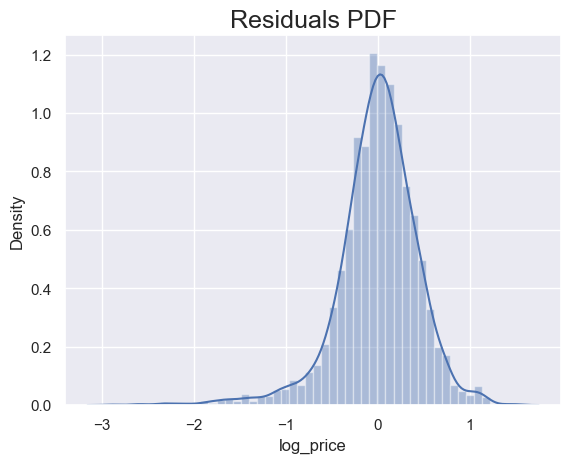

In [168]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

The result looks quite normal, in the sense of normally distributed. The mean seems to be 0 too.
The only possible issue could be, that there is a much longer tail on the negative side. Therefore, there are certain observations, for which (y_train - y_hat) is much lower than the mean (a much higher price is predicted than is observed)

In [169]:
reg.score(x_train,y_train)

0.744996578792662

The R-Squared of the model is around 75%. Therefore, the model is explaining 75% of the variability of the data. This is a relatively good result

### Finding the weights and bias


In [170]:
reg.intercept_

9.415239458021299

In [171]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [172]:
reg.summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg.summary['Weights'] = reg.coef_
reg.summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


*Weights interpretation* \
I. Continuous variables:
1. A positive weight shows that as a feature increases in value, so do the log_price and 'Price' respectively 
2. A negative weight shows that as a feature increases in value, the log_price and 'Price' decrease 

II. Dummy variables:
1. A positive weight shows that the respective category (Brand) is more expensive than the benchmark (Audi)
2. A positive weight shows that the respective category (Brand) is less expensive than the benchmark (Audi) \
 ** Dummies are only compared to their respective benchmark

*The bigger the weight, the bigger the impact*

## Testing

In [173]:
y_hat_test = reg.predict(x_test)

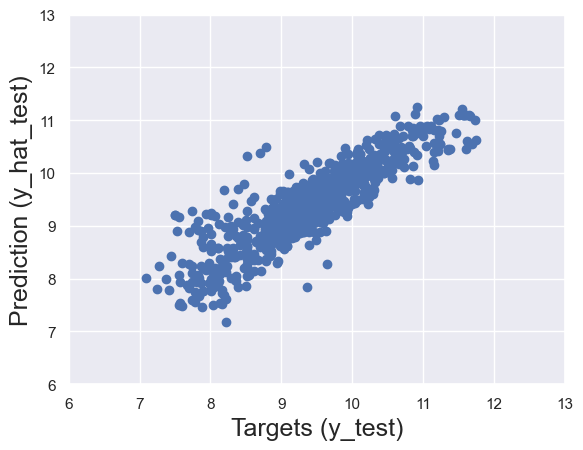

In [174]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Prediction (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

For higher prices, we have a higher concentration of values around the 45 degree line. Therefore, our model is very good at predicting higher prices. However, for lower ones, they are much more scattered, pointing to the fact that we are not quite getting the prices right 

plt.scatter(x,y [,alpha]): alpha specifies the opacity
We can include an additional argument to the scatter plot called alpha which will show the proportional opacity of the points.

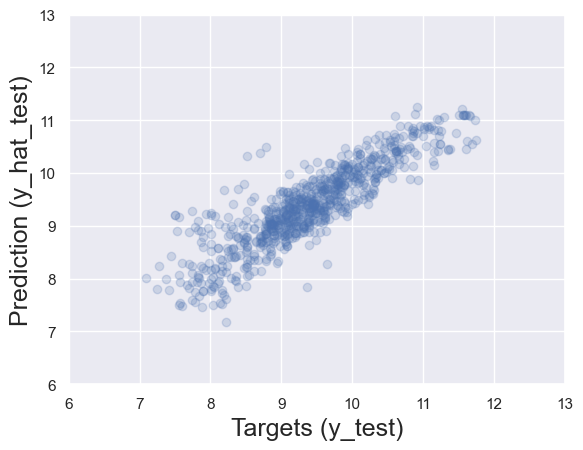

In [175]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Prediction (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

The more saturated the color the higher the concentration of points. The paler the color, the lower the concentration of points. \
We have a much clearer indication showing most of the points are indeed very close to the 45 degree line.

In [176]:
#Dataframe Performance
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head() #these are the predictions for the log prices 

,Prediction
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


np.exp(x): returns the exponentiall of x (the Euler number 'e' to the power of x)

In [177]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head() 

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [178]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


Unfortunately, we have a lot of missing values 
and they're quite randomly spread.

In [179]:
y_test

1192     7.740664
3360     7.937375
2350     7.824046
3257     8.764053
892      9.121509
          ...    
1935    10.292146
3757     9.169518
3134     9.814656
1369    11.134589
2595     9.287301
Name: log_price, Length: 774, dtype: float64

To try to understand issues like this one 
we can display the y_test dataFram 

What we notice is it contains inde s.

In fact, when we split the data into train an test

the original indices were pr erved.

So when we added y_tes, o df_pf,

pandas tried to match  e indices.

What we need is to forget this original indexing.

To try to understand issues like this one we can display the y_test dataFrame. What we notice is it contains indexes. In fact, when we split the data into train and test the original indices were preserved. So when we added y_test to df_pf, pandas tried to match the indices. What we need is to forget this original indexing.

In [180]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [181]:
#Overwrite the exponential of y_tets in df_pf target
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


So we have the predictions and the targets 
and now we can proceed to comparing them

In [187]:
# The residual represents the error or deviation of the prediction from the actual value
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [188]:
# This percentage shows how far off the prediction is relative to the actual value.
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf 

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [189]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


The minimum difference in percentages is 0.06%. So the output was entirely accurate.\
The maximum difference in percentages, however, is significantly inaccurate. \
Apart from the minimums and maximums, there are the percentiles. All of these tell us that for most of our predictions we got relatively close.

In [191]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


Revising this dataFrame manually we can see for which types of observations we've got good predictions, and for which we are very far off.

Going to the bottom of the dataFrame, we see that there are very few predictions dramatically far off from the observed values ('Target'). If you look closely at the observed column, you notice that the observed prices are extremely low. \
The model is using the mileage, engine volume, brand, registration and body type to predict the price of a used car. On average, it is pretty decent at predicting the price. But for these last samples though it isn't. An important note is that all residuals for these outliers are negative. Therefore, their predictions are higher than the targets. \
An explanation may be that we are missing an important factor which drives the price of a used car lower. It may be the model of the car which we removed at the beginning of the analysis but it may also be that the car was damaged in some way, a piece of information we did not initially have.

So there are different ways in which we can make our model better. We could use a different set of variables, we could remove a bigger part of the outlier observations or use different kinds of transformations.